# 1) Loading Files

In [18]:
from os import listdir, path

It is expected to exist two directories containing two distinct image sets

The compressed files containing theses image sets can be found in: ...

The extracted figures were organized in such a way that pictures are in subdirectory 'pictures' and their respective groud truths are in the subdirectory 'gts'.

Each image set was obtained in different conditions:
 - A - two conditions: A1) normal soil [1-18], and A2) compacted soil [19-40];
 - B (new set) - not calibrated images

In [2]:
dirA = '../IC2017_DATA/suborbitalRS_40_check/'
dirB = '../IC2017_DATA/newimages_lcrs2/'

In [29]:
path_pics = []
path_gts = []
for d in [dirA, dirB]:
    path_pics.extend(sorted([path.join(d, 'pictures', file) for file in listdir(d + 'pictures')]))
    path_gts.extend(sorted([path.join(d, 'gts', file) for file in listdir(d + 'gts')]))

In [34]:
# checking paths
path_pics[:5], path_gts[:5]

(['../IC2017_DATA/suborbitalRS_40_check/pictures/img01.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img02.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img03.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img04.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img05.png'],
 ['../IC2017_DATA/suborbitalRS_40_check/gts/gt01.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt02.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt03.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt04.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt05.png'])

# 2) Cheking the images

## 2.1) visualizing image types

In [40]:
import matplotlib.pyplot as plt
from skimage.io import imread

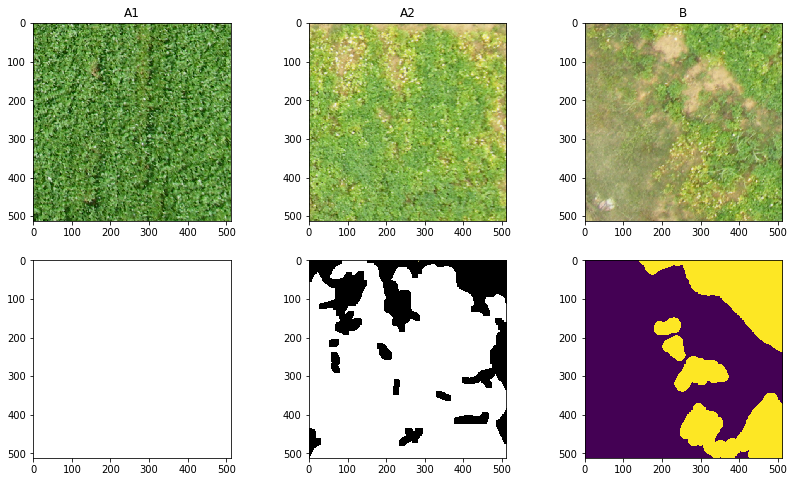

In [65]:
# pictures on the top and their respective gts below
plt.figure(figsize=(14,8))
types = [('A1', 0), ('A2', 19), ('B', 40 + 1)]

for i, (name, num) in enumerate(types):
    plt.subplot(2, 3, i + 1)
    plt.title(name)
    plt.imshow(imread(path_pics[num]))
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(imread(path_gts[num]))

## 2.2) checking images sizes

In [66]:
invalid_images = set()

print('Testing pictures:')
for i, path in enumerate(path_pics):
    pic = imread(path)
    a, b, c = pic.shape
    if (a, b) != (512, 512):
        invalid_images.add(i)
        print('> picture %s has wrong resolution (%d, %d).' % (path, a, b))
print('Done.\n')


print('Testing gts:')
for i, path in enumerate(path_gts):
    gt = imread(path)
    a, b = gt.shape[:2]
    if (a, b) != (512, 512):
        invalid_images.add(i)
        print('> gt %s has wrong resolution (%d, %d).' % (path, a, b))
print('Done.\n')

Testing pictures:
Done.

Testing gts:
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt12.png has wrong resolution (510, 512).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt21.png has wrong resolution (506, 512).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt31.png has wrong resolution (510, 512).
Done.



> Some images will have to be removed!

In [67]:
invalid_images

{11, 20, 30}

## 2.3) Checking num of channels

In [62]:
# checking num of channels
print('Testing pictures:')
for path in path_pics:
    pic = imread(path)
    c = pic.shape[2]
    if c != 4:
        print('> picture %s has different num of channels (%d).' % (path, c))

print()
print('Testing gts:')
for path in path_gts:
    gt = imread(path)
    if len(gt.shape) > 2:
        c = gt.shape[2]
        print('> gt %s has extra channels (%d).' % (path, c))

Testing pictures:
> picture ../IC2017_DATA/newimages_lcrs2/pictures/deg21.png has different num of channels (3).

Testing gts:
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt01.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt02.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt03.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt04.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt05.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt07.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt09.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt10.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt11.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt12.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt14.png has extra channels (4).
> gt

> Having different numbers of channels is not a huge problem. But it means extra care will be necessary when reading the images to make all them fit a standard.

# 3) Rotating image

In [69]:
pic = imread(path_pics[19])

In [70]:
from scipy.ndimage.interpolation import rotate

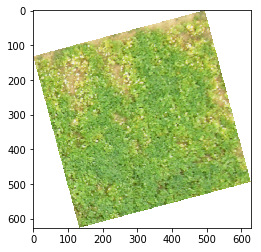

In [73]:
rot = rotate(pic, 15)
plt.imshow(rot)

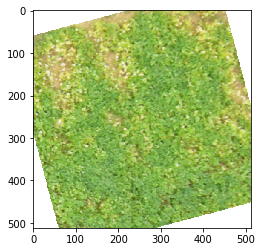

In [74]:
rot = rotate(pic, 15, reshape=False)
plt.imshow(rot)

## 3.1) Finding ways to rotate back

### 3.1.1) Rotating an index matrix first

In [76]:
import numpy as np

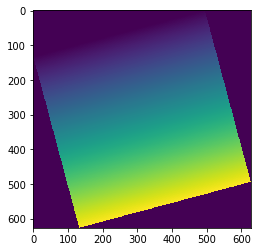

In [78]:
a = np.arange(512*512).reshape((512, 512))
rot = rotate(a, 15)
plt.imshow(rot)

In [82]:
np.isin(np.arange(512*512), np.unique(rot)).mean()

0.5687141418457031

> This won't work. When the matrix is rotate the the integer indices are modified by the interpolation

### 3.1.2) Just rotating back, by finding the right numbers

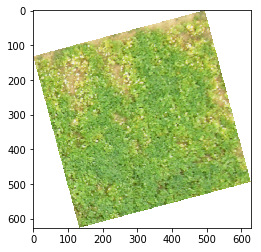

In [83]:
rot = rotate(pic, 15)
plt.imshow(rot)

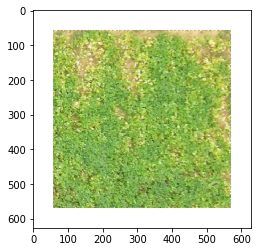

In [96]:
rot2 = rotate(rot, -15, reshape = False)
plt.imshow(rot2)

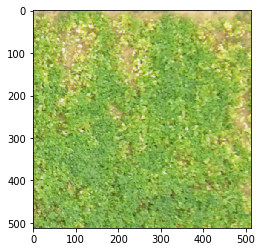

In [97]:
delta = (rot2.shape[0] - 512) // 2
plt.imshow(rot2[delta:delta+512, delta:delta+512])

> Seems to work well.

## 3.2) Checking is mirroring is acceptable

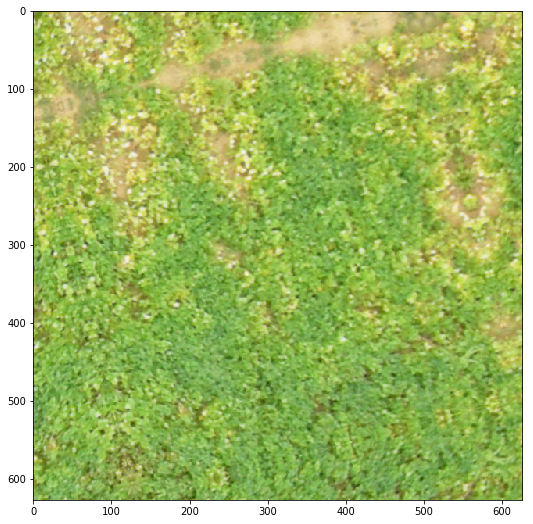

In [101]:
# mirrored
plt.figure(figsize=(9,9))
rot3 = rotate(pic, 15, mode = 'mirror')
plt.imshow(rot3)

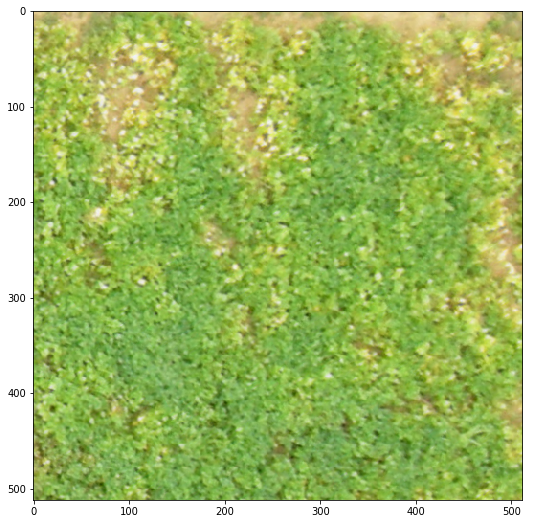

In [102]:
# original
plt.figure(figsize=(9,9))
plt.imshow(pic)

# 4) Filters

In [113]:
from scipy.signal import convolve2d

## 4.1) Motion blur

In [156]:
n = 9
kernel = np.zeros((n, n), int)
kernel[n // 2, :] = 1
kernel = kernel / kernel.sum()
kernel

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [157]:
out = np.zeros((512, 512, 3), int)

In [158]:
for c in range(3):
    out[:,:,c] = convolve2d(pic[:,:,c], kernel, mode = 'same', boundary = 'symm')

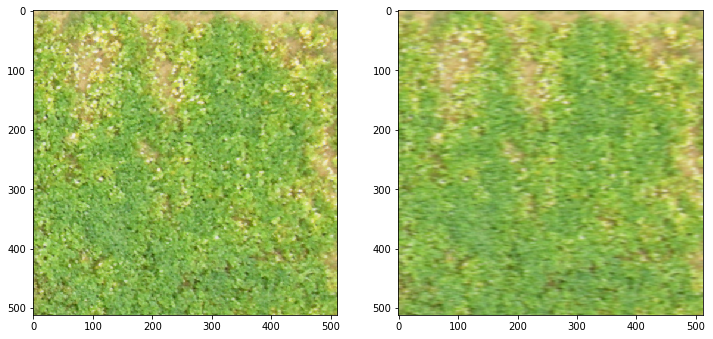

In [159]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(pic)

plt.subplot(1, 2, 2)
plt.imshow(out)

## 4.2) Gaussian

In [168]:
n = 5
kernel = np.ones((n, n), int)
# kernel[n // 2, :] = 1
kernel = kernel / kernel.sum()
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [169]:
out = np.zeros((512, 512, 3), int)

In [170]:
for c in range(3):
    out[:,:,c] = convolve2d(pic[:,:,c], kernel, mode = 'same', boundary = 'symm')

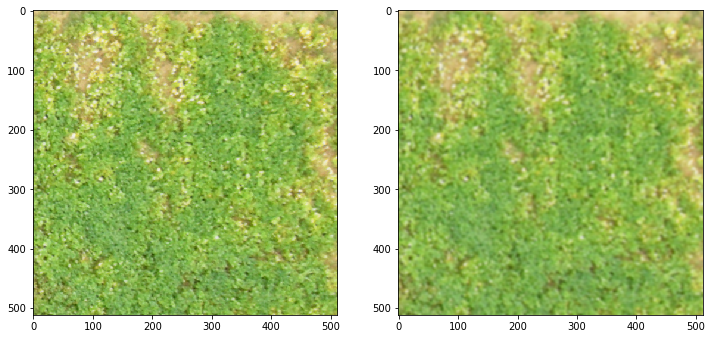

In [171]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(pic)

plt.subplot(1, 2, 2)
plt.imshow(out)